<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/robert/rnn_wtcell7model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/robertchoi/BatteryDatasetImplementation/blob/master/robert/rnn_wtcell7model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
</table>

In [181]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [182]:
def load_data(fname='../wt_data/J0003_0024_0222_20110307012737_cell_7.csv'):
    dataset = pd.read_csv(fname, usecols=[2])
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Resistance')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn

In [183]:
def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

In [184]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    #m.compile('adam', 'mean_squared_error')
    #m.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())
    m.compile(loss='mse', optimizer='adam', metrics=['mse'])


    m.summary()
    
    return m

In [185]:
class Dataset:
    def __init__(self, fname='../wt_data/J0003_0024_0222_20110307012737_cell_7.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test   

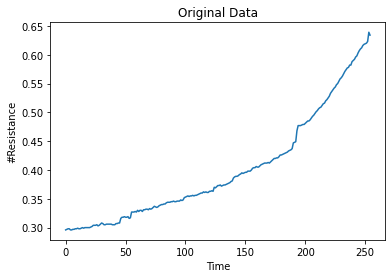

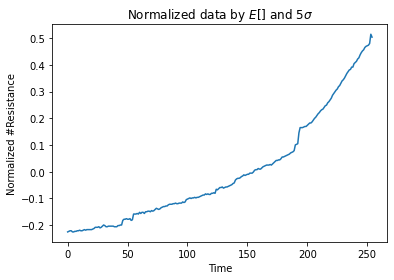

(242, 12, 1) (242,)
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 12, 1)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [186]:
data = Dataset()
shape = data.X.shape[1:]
model = rnn_model(shape)

In [187]:
X_train, X_test, y_train, y_test = data.X_train, data.X_test, data.y_train, data.y_test
X, y = data.X, data.y
m = model

In [188]:
h = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=(X_test, y_test))

Train on 193 samples, validate on 49 samples
Epoch 1/1000
193/193 [==============================] - 2s 9ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 2/1000
193/193 [==============================] - 0s 225us/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 3/1000
193/193 [==============================] - 0s 224us/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 4/1000
193/193 [==============================] - 0s 237us/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 5/1000
193/193 [==============================] - 0s 213us/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 6/1000
193/193 [==============================] - 0s 226us/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 7/1000
193/193 [==============================] - 0s 223us/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0487 - val_mse: 0.0487
Epoch

Epoch 58/1000
193/193 [==============================] - 0s 217us/step - loss: 1.3870e-04 - mse: 1.3870e-04 - val_loss: 1.2398e-04 - val_mse: 1.2398e-04
Epoch 59/1000
193/193 [==============================] - 0s 203us/step - loss: 1.3623e-04 - mse: 1.3623e-04 - val_loss: 1.2115e-04 - val_mse: 1.2115e-04
Epoch 60/1000
193/193 [==============================] - 0s 203us/step - loss: 1.3284e-04 - mse: 1.3284e-04 - val_loss: 1.1701e-04 - val_mse: 1.1701e-04
Epoch 61/1000
193/193 [==============================] - 0s 210us/step - loss: 1.2937e-04 - mse: 1.2937e-04 - val_loss: 1.1350e-04 - val_mse: 1.1350e-04
Epoch 62/1000
193/193 [==============================] - 0s 214us/step - loss: 1.2523e-04 - mse: 1.2523e-04 - val_loss: 1.0911e-04 - val_mse: 1.0911e-04
Epoch 63/1000
193/193 [==============================] - 0s 207us/step - loss: 1.2175e-04 - mse: 1.2175e-04 - val_loss: 1.0450e-04 - val_mse: 1.0450e-04
Epoch 64/1000
193/193 [==============================] - 0s 207us/step - loss: 1.1

193/193 [==============================] - 0s 198us/step - loss: 9.5156e-05 - mse: 9.5156e-05 - val_loss: 6.9051e-05 - val_mse: 6.9051e-05
Epoch 165/1000
193/193 [==============================] - 0s 206us/step - loss: 9.5413e-05 - mse: 9.5413e-05 - val_loss: 6.8680e-05 - val_mse: 6.8680e-05
Epoch 166/1000
193/193 [==============================] - 0s 215us/step - loss: 9.5423e-05 - mse: 9.5423e-05 - val_loss: 6.7265e-05 - val_mse: 6.7265e-05
Epoch 167/1000
193/193 [==============================] - 0s 201us/step - loss: 9.5289e-05 - mse: 9.5289e-05 - val_loss: 6.7693e-05 - val_mse: 6.7693e-05
Epoch 168/1000
193/193 [==============================] - 0s 216us/step - loss: 9.6015e-05 - mse: 9.6015e-05 - val_loss: 6.9257e-05 - val_mse: 6.9257e-05
Epoch 169/1000
193/193 [==============================] - 0s 207us/step - loss: 9.4988e-05 - mse: 9.4988e-05 - val_loss: 6.8825e-05 - val_mse: 6.8825e-05
Epoch 170/1000
193/193 [==============================] - 0s 209us/step - loss: 9.4874e-05 

193/193 [==============================] - 0s 208us/step - loss: 9.1690e-05 - mse: 9.1690e-05 - val_loss: 6.5064e-05 - val_mse: 6.5064e-05
Epoch 271/1000
193/193 [==============================] - 0s 215us/step - loss: 9.2362e-05 - mse: 9.2362e-05 - val_loss: 6.5399e-05 - val_mse: 6.5399e-05
Epoch 272/1000
193/193 [==============================] - 0s 203us/step - loss: 9.1701e-05 - mse: 9.1701e-05 - val_loss: 6.3821e-05 - val_mse: 6.3821e-05
Epoch 273/1000
193/193 [==============================] - 0s 202us/step - loss: 9.1520e-05 - mse: 9.1520e-05 - val_loss: 6.2834e-05 - val_mse: 6.2834e-05
Epoch 274/1000
193/193 [==============================] - 0s 203us/step - loss: 9.1981e-05 - mse: 9.1981e-05 - val_loss: 6.2992e-05 - val_mse: 6.2992e-05
Epoch 275/1000
193/193 [==============================] - 0s 202us/step - loss: 9.1601e-05 - mse: 9.1601e-05 - val_loss: 6.4320e-05 - val_mse: 6.4320e-05
Epoch 276/1000
193/193 [==============================] - 0s 218us/step - loss: 9.1792e-05 

193/193 [==============================] - 0s 208us/step - loss: 8.8341e-05 - mse: 8.8341e-05 - val_loss: 6.0062e-05 - val_mse: 6.0062e-05
Epoch 377/1000
193/193 [==============================] - 0s 202us/step - loss: 8.9093e-05 - mse: 8.9093e-05 - val_loss: 6.3269e-05 - val_mse: 6.3269e-05
Epoch 378/1000
193/193 [==============================] - 0s 203us/step - loss: 8.8747e-05 - mse: 8.8747e-05 - val_loss: 6.0640e-05 - val_mse: 6.0640e-05
Epoch 379/1000
193/193 [==============================] - 0s 218us/step - loss: 8.7992e-05 - mse: 8.7992e-05 - val_loss: 5.8146e-05 - val_mse: 5.8146e-05
Epoch 380/1000
193/193 [==============================] - 0s 210us/step - loss: 8.8579e-05 - mse: 8.8579e-05 - val_loss: 5.8366e-05 - val_mse: 5.8366e-05
Epoch 381/1000
193/193 [==============================] - 0s 211us/step - loss: 8.8082e-05 - mse: 8.8082e-05 - val_loss: 6.0091e-05 - val_mse: 6.0091e-05
Epoch 382/1000
193/193 [==============================] - 0s 200us/step - loss: 8.8048e-05 

193/193 [==============================] - 0s 209us/step - loss: 8.4667e-05 - mse: 8.4667e-05 - val_loss: 5.5061e-05 - val_mse: 5.5061e-05
Epoch 483/1000
193/193 [==============================] - 0s 217us/step - loss: 8.4556e-05 - mse: 8.4556e-05 - val_loss: 5.5910e-05 - val_mse: 5.5910e-05
Epoch 484/1000
193/193 [==============================] - 0s 201us/step - loss: 8.5125e-05 - mse: 8.5125e-05 - val_loss: 5.7960e-05 - val_mse: 5.7960e-05
Epoch 485/1000
193/193 [==============================] - 0s 210us/step - loss: 8.4623e-05 - mse: 8.4623e-05 - val_loss: 5.5535e-05 - val_mse: 5.5535e-05
Epoch 486/1000
193/193 [==============================] - 0s 206us/step - loss: 8.4326e-05 - mse: 8.4326e-05 - val_loss: 5.4413e-05 - val_mse: 5.4413e-05
Epoch 487/1000
193/193 [==============================] - 0s 244us/step - loss: 8.4600e-05 - mse: 8.4600e-05 - val_loss: 5.5082e-05 - val_mse: 5.5082e-05
Epoch 488/1000
193/193 [==============================] - 0s 211us/step - loss: 8.4341e-05 

193/193 [==============================] - 0s 204us/step - loss: 8.2023e-05 - mse: 8.2023e-05 - val_loss: 5.3107e-05 - val_mse: 5.3107e-05
Epoch 589/1000
193/193 [==============================] - 0s 207us/step - loss: 8.2021e-05 - mse: 8.2021e-05 - val_loss: 5.0894e-05 - val_mse: 5.0894e-05
Epoch 590/1000
193/193 [==============================] - 0s 202us/step - loss: 8.1272e-05 - mse: 8.1272e-05 - val_loss: 5.1991e-05 - val_mse: 5.1991e-05
Epoch 591/1000
193/193 [==============================] - 0s 208us/step - loss: 8.1255e-05 - mse: 8.1255e-05 - val_loss: 5.3420e-05 - val_mse: 5.3420e-05
Epoch 592/1000
193/193 [==============================] - 0s 204us/step - loss: 8.1328e-05 - mse: 8.1328e-05 - val_loss: 5.1753e-05 - val_mse: 5.1753e-05
Epoch 593/1000
193/193 [==============================] - 0s 223us/step - loss: 8.1811e-05 - mse: 8.1811e-05 - val_loss: 5.2157e-05 - val_mse: 5.2157e-05
Epoch 594/1000
193/193 [==============================] - 0s 201us/step - loss: 8.0911e-05 

193/193 [==============================] - 0s 211us/step - loss: 7.8186e-05 - mse: 7.8186e-05 - val_loss: 4.8498e-05 - val_mse: 4.8498e-05
Epoch 695/1000
193/193 [==============================] - 0s 200us/step - loss: 7.9416e-05 - mse: 7.9416e-05 - val_loss: 4.7840e-05 - val_mse: 4.7840e-05
Epoch 696/1000
193/193 [==============================] - 0s 198us/step - loss: 7.8806e-05 - mse: 7.8806e-05 - val_loss: 5.1289e-05 - val_mse: 5.1289e-05
Epoch 697/1000
193/193 [==============================] - 0s 213us/step - loss: 7.8537e-05 - mse: 7.8537e-05 - val_loss: 5.0278e-05 - val_mse: 5.0278e-05
Epoch 698/1000
193/193 [==============================] - 0s 200us/step - loss: 7.8277e-05 - mse: 7.8277e-05 - val_loss: 4.8236e-05 - val_mse: 4.8236e-05
Epoch 699/1000
193/193 [==============================] - 0s 208us/step - loss: 7.8226e-05 - mse: 7.8226e-05 - val_loss: 4.8400e-05 - val_mse: 4.8400e-05
Epoch 700/1000
193/193 [==============================] - 0s 201us/step - loss: 7.9234e-05 

193/193 [==============================] - 0s 235us/step - loss: 7.6227e-05 - mse: 7.6227e-05 - val_loss: 4.6619e-05 - val_mse: 4.6619e-05
Epoch 801/1000
193/193 [==============================] - 0s 225us/step - loss: 7.6350e-05 - mse: 7.6350e-05 - val_loss: 4.6234e-05 - val_mse: 4.6234e-05
Epoch 802/1000
193/193 [==============================] - 0s 210us/step - loss: 7.5852e-05 - mse: 7.5852e-05 - val_loss: 4.5866e-05 - val_mse: 4.5866e-05
Epoch 803/1000
193/193 [==============================] - 0s 226us/step - loss: 7.5938e-05 - mse: 7.5938e-05 - val_loss: 4.7097e-05 - val_mse: 4.7097e-05
Epoch 804/1000
193/193 [==============================] - 0s 220us/step - loss: 7.5863e-05 - mse: 7.5863e-05 - val_loss: 4.8580e-05 - val_mse: 4.8580e-05
Epoch 805/1000
193/193 [==============================] - 0s 217us/step - loss: 7.6154e-05 - mse: 7.6154e-05 - val_loss: 4.7100e-05 - val_mse: 4.7100e-05
Epoch 806/1000
193/193 [==============================] - 0s 225us/step - loss: 7.6286e-05 

193/193 [==============================] - 0s 219us/step - loss: 7.4382e-05 - mse: 7.4382e-05 - val_loss: 4.5593e-05 - val_mse: 4.5593e-05
Epoch 907/1000
193/193 [==============================] - 0s 219us/step - loss: 7.4532e-05 - mse: 7.4532e-05 - val_loss: 4.9250e-05 - val_mse: 4.9250e-05
Epoch 908/1000
193/193 [==============================] - 0s 223us/step - loss: 7.4483e-05 - mse: 7.4483e-05 - val_loss: 4.4954e-05 - val_mse: 4.4954e-05
Epoch 909/1000
193/193 [==============================] - 0s 217us/step - loss: 7.3638e-05 - mse: 7.3638e-05 - val_loss: 4.3943e-05 - val_mse: 4.3943e-05
Epoch 910/1000
193/193 [==============================] - 0s 210us/step - loss: 7.5210e-05 - mse: 7.5210e-05 - val_loss: 4.4677e-05 - val_mse: 4.4677e-05
Epoch 911/1000
193/193 [==============================] - 0s 216us/step - loss: 7.4903e-05 - mse: 7.4903e-05 - val_loss: 5.0517e-05 - val_mse: 5.0517e-05
Epoch 912/1000
193/193 [==============================] - 0s 200us/step - loss: 7.5128e-05 

In [189]:
print(h.history.keys())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


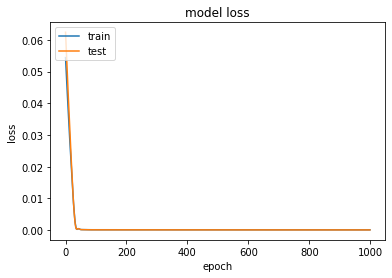

In [190]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

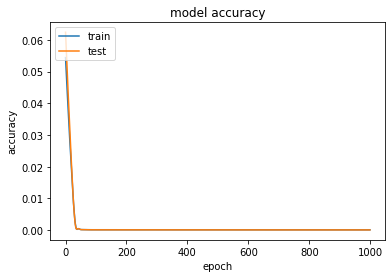

In [192]:
# summarize history for accuracy
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

49/49 [==============================] - 0s 159us/step
Loss: [4.463789988147589e-05, 4.4637901737587526e-05]


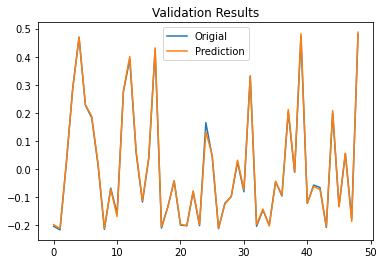

In [193]:
yp = m.predict(X_test)
print('Loss:', m.evaluate(X_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [194]:
yp = m.predict(X_test).reshape(-1)
print('Loss:', m.evaluate(X_test, y_test))  
print(yp.shape, y_test.shape)

49/49 [==============================] - 0s 181us/step
Loss: [4.463789988147589e-05, 4.4637901737587526e-05]
(49,) (49,)


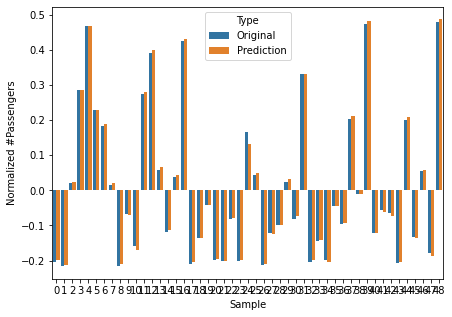

In [195]:
df = pd.DataFrame()
df['Sample'] = list(range(len(y_test))) * 2
df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

plt.figure(figsize=(7, 5))
sns.barplot(x="Sample", y="Normalized #Passengers", hue="Type", data=df)
plt.ylabel('Normalized #Passengers')
plt.show()

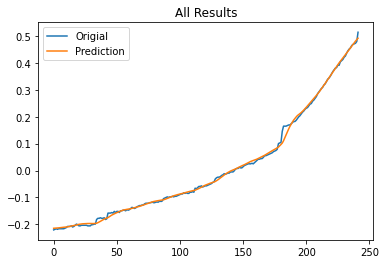

In [196]:
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

In [197]:
model.save('rnn_cell7_model.h5')

In [198]:
dftest = pd.DataFrame(y)
dftest.head()

,0
0,-0.220950
1,-0.218793
2,-0.216636
3,-0.218793
4,-0.216636


In [199]:
dftest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,242.0,0.008946,0.196793,-0.22095,-0.144383,-0.057033,0.135462,0.51452


In [200]:
dfytest = pd.DataFrame(yp)
dfytest.head()

,0
0,-0.214827
1,-0.214495
2,-0.214099
3,-0.213618
4,-0.213310


In [201]:
dfytest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,242.0,0.009335,0.196811,-0.214827,-0.142534,-0.05356,0.100793,0.492299


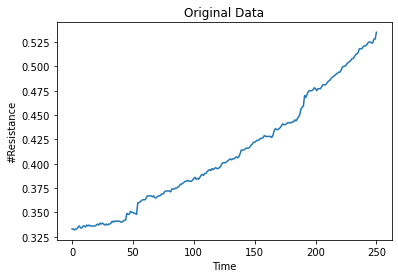

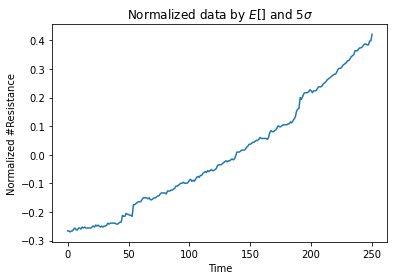

(238, 12, 1) (238,)
48/48 [==============================] - 0s 178us/step
Loss: [0.00015019036557835838, 0.00015019036072771996]


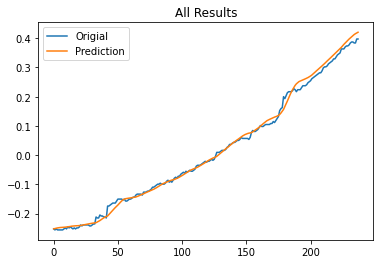

In [216]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_23.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

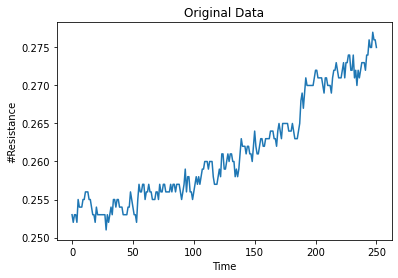

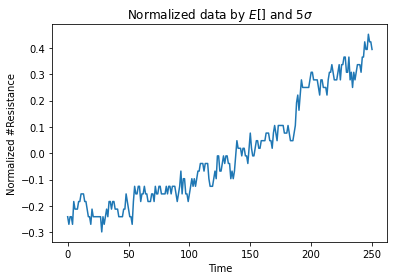

(238, 12, 1) (238,)
48/48 [==============================] - 0s 209us/step
Loss: [0.001989904325455427, 0.001989904325455427]


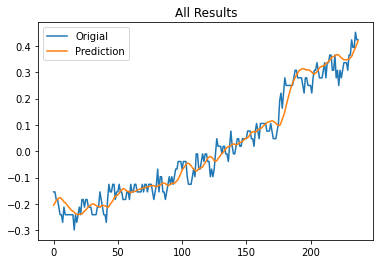

In [217]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_22.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

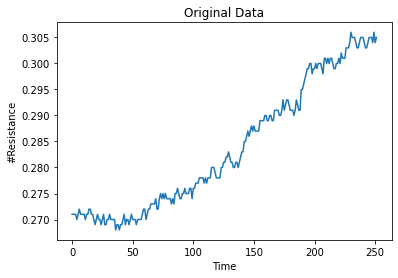

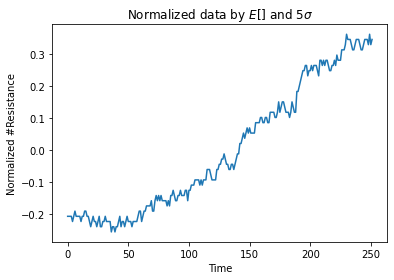

(239, 12, 1) (239,)
48/48 [==============================] - 0s 178us/step
Loss: [0.0006212342123035342, 0.0006212342414073646]


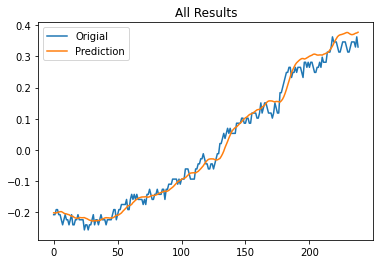

In [218]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_20.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

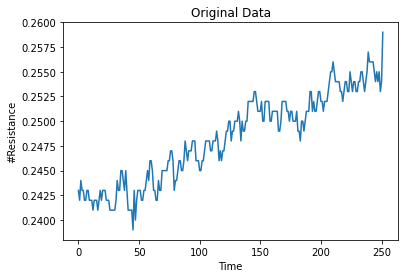

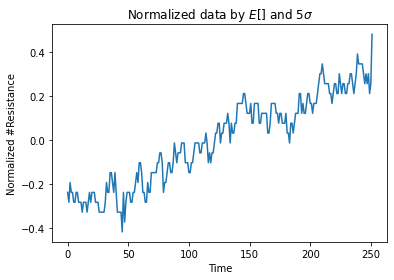

(239, 12, 1) (239,)
48/48 [==============================] - 0s 171us/step
Loss: [0.0031149704785396657, 0.003114970400929451]


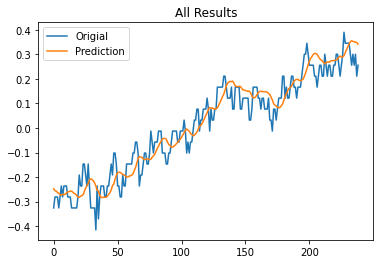

In [219]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_19.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

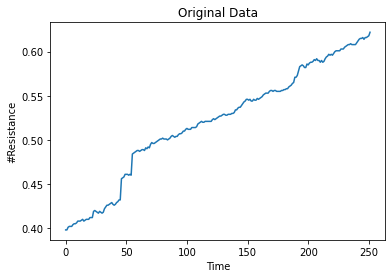

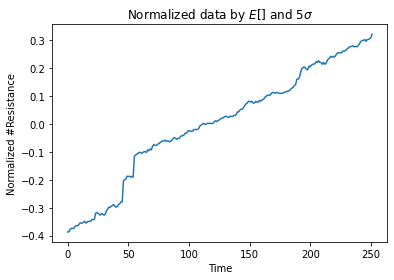

(239, 12, 1) (239,)
48/48 [==============================] - 0s 189us/step
Loss: [0.0004135403723921627, 0.0004135403723921627]


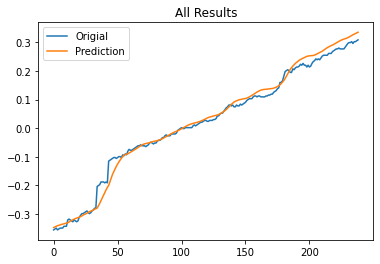

In [220]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_18.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

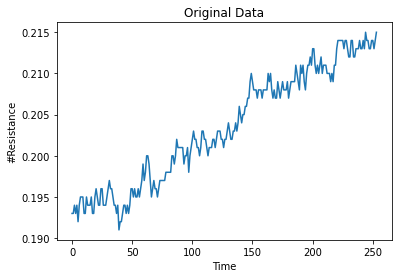

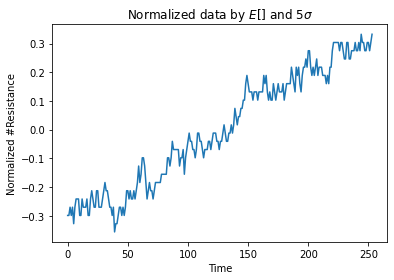

(241, 12, 1) (241,)
49/49 [==============================] - 0s 186us/step
Loss: [0.0016823155396827022, 0.0016823156038299203]


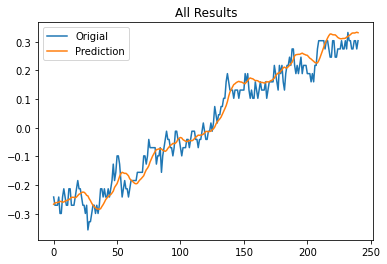

In [221]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_9.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

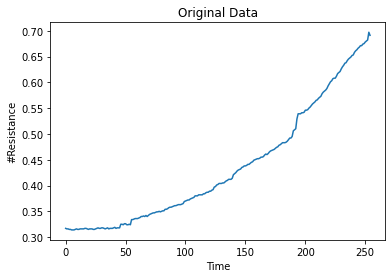

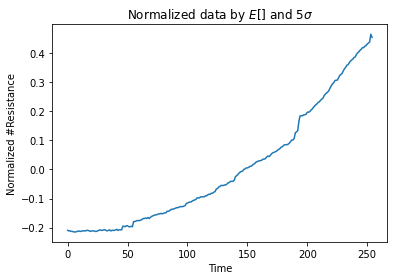

(242, 12, 1) (242,)
49/49 [==============================] - 0s 183us/step
Loss: [7.164491962983597e-05, 7.164491398725659e-05]


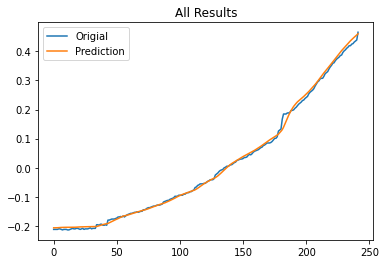

In [222]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_7.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

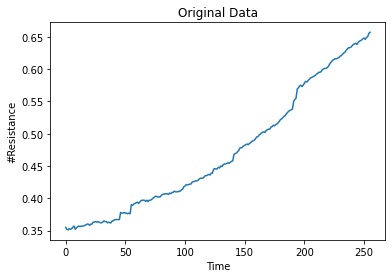

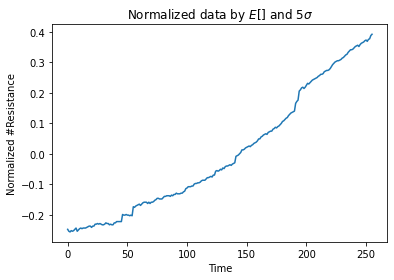

(243, 12, 1) (243,)
49/49 [==============================] - 0s 175us/step
Loss: [0.00015090778024572576, 0.00015090778470039368]


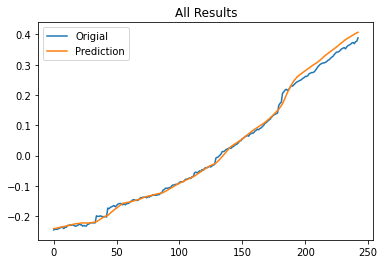

In [223]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_06.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

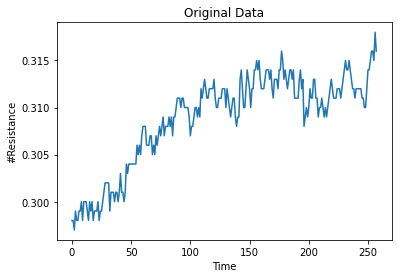

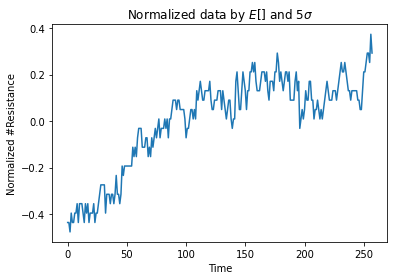

(245, 12, 1) (245,)
49/49 [==============================] - 0s 176us/step
Loss: [0.0035335203936817695, 0.003533520270138979]


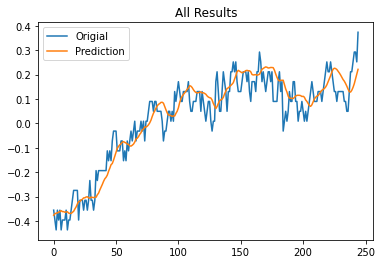

In [224]:
fname='../wt_data/J0003_0024_0221_20110307012732_cell_03.csv'    
dataset = pd.read_csv(fname, usecols=[2])
data = dataset.values.reshape(-1)
plt.plot(data)
plt.xlabel('Time'); plt.ylabel('#Resistance')
plt.title('Original Data')
plt.show()

    # data normalize
data_dn = (data - np.mean(data)) / np.std(data) / 5
plt.plot(data_dn)
plt.xlabel('Time'); plt.ylabel('Normalized #Resistance')
plt.title('Normalized data by $E[]$ and $5\sigma$')
plt.show()



X, y = get_Xy(data_dn, D=12)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 
print('Loss:', m.evaluate(X_test, y_test)) 
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()